# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [2]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [3]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [8]:
print(iris.keys())        # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
print(iris.data[0:10])    # first 10 rows of data
print(type(iris.data))    # <class 'numpy.ndarray'>
print(iris.target_names)  # ['setosa' 'versicolor' 'virginica']
print(iris.target)        # target values (0, 1, 2) for each row in data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# we only take the first two features. 
X = iris.data[:, :2]
print(X.shape)  # (150, 2)
Y = iris.target
print(Y.shape)  # (150,)

(150, 2)
(150,)


In [11]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
print("target_names:", str(iris['target_names']))

target_names: ['setosa' 'versicolor' 'virginica']


In [14]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [17]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [ ]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data
# print(iris['data'].size/len(iris['feture names']))  # 4.0 features per sample

4.0


## 切分訓練集與測試集
> train_test_split()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data['target'], test_size=0.2)

In [30]:
X_train.head()
X_train.shape

(80, 2)

In [43]:
X_test.head()
X_test.shape

(20, 2)

In [44]:
Y_train = pd.DataFrame(Y_train, columns=['target'])
Y_train.head()

,target
83,1
88,1
36,0
38,0
64,1


In [45]:
Y_test = pd.DataFrame(Y_test, columns=['target'])
Y_test.head()

,target
75,1
18,0
12,0
24,0
44,0


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [56]:
def norm_stats(dfs):
    minimum = dfs.min()
    maximum = dfs.max()
    mu = dfs.mean()
    sigma = dfs.std()
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    minimum, maximum, mu, sigma = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c] - mu[c]) / sigma[c]
    return df


In [60]:
stats = norm_stats(X_test)
x_test_z = z_score(X_test, stats)
arr_x_test = x_test_z.to_numpy()  # 或 np.array(x_test_z)
arr_x_test

array([[ 1.82525874,  1.11771488],
       [ 0.30420979, -0.85472314],
       [-1.21683916, -1.07388293],
       [-1.21683916, -0.70861662],
       [-0.70982284, -0.70861662],
       [-0.20280653, -1.00082967],
       [-0.87882828, -0.92777641],
       [-0.87882828, -1.00082967],
       [-0.20280653, -0.85472314],
       [-0.03380109,  0.60634206],
       [-1.04783372,  0.31412902],
       [ 1.14923698,  1.04466162],
       [-0.70982284, -1.07388293],
       [ 1.31824242,  1.33687466],
       [ 1.31824242,  1.48298118],
       [-1.3858446 , -1.14693619],
       [ 0.30420979,  0.97160836],
       [ 0.30420979,  0.46023554],
       [ 1.14923698,  1.19076814],
       [ 0.8112261 ,  0.82550184]])

## use sklearn

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.45875 2.85875]
[0.65243654 1.4680509 ]


In [64]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[ 0.8295826 ,  1.52668413],
       [ 0.21649615,  0.84550883],
       [ 0.06322454, -1.06178199],
       [-1.62276319, -1.06178199],
       [ 0.21649615,  0.50492119]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [65]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 1.74921227  1.04986142]
 [ 0.36976776 -0.78931187]
 [-1.00967674 -0.99366446]
 [-1.00967674 -0.65307681]
 [-0.54986191 -0.65307681]
 [-0.09004707 -0.92554693]
 [-0.70313352 -0.8574294 ]
 [-0.70313352 -0.92554693]
 [-0.09004707 -0.78931187]
 [ 0.06322454  0.57303872]]


you can also use fit_transform method (i.e., fit and then transform)    

In [66]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[ 1.87267595  1.14675127]
 [ 0.31211266 -0.87692744]
 [-1.24845063 -1.10178063]
 [-1.24845063 -0.72702532]
 [-0.72826287 -0.72702532]
 [-0.20807511 -1.02682957]
 [-0.90165879 -0.95187851]
 [-0.90165879 -1.02682957]
 [-0.20807511 -0.87692744]
 [-0.03467918  0.62209383]]


In [67]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.19697422026202
28.381540421620247


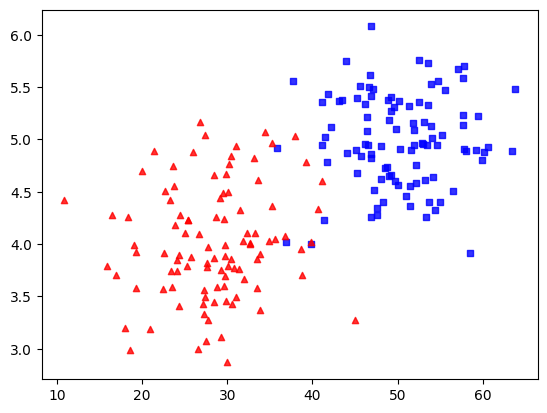

In [69]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [70]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [71]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [72]:
minmax_norm(x_val[:10])

array([0.        , 0.22092477, 0.38476841, 0.6108578 , 0.40666472,
       1.        , 0.64044513, 0.23841233, 0.12701192, 0.81359807])

In [74]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200, 1)
[63.8012555]
[[0.61488779]
 [0.67443983]
 [0.7186052 ]
 [0.77954941]
 [0.72450753]
 [0.88444582]
 [0.78752492]
 [0.67915375]
 [0.64912487]
 [0.83419968]]
